In [1]:
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
    .appName("AnnualHousePriceIndex") \
    .getOrCreate()

# Read CSV file into DataFrame
path = "/Users/shivanivellanki/Downloads/HPI_AT_BDL_ZIP5.csv"
AnnualHousePriceIndexDF = spark.read.csv(path, header=True, inferSchema=True)

# Assign a temporary view to the DataFrame
AnnualHousePriceIndexDF.createOrReplaceTempView("annual_house_price_index")

# Show the DataFrame
AnnualHousePriceIndexDF.show()

23/07/01 11:54:47 WARN Utils: Your hostname, Rohiths-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.0.0.244 instead (on interface en0)
23/07/01 11:54:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/01 11:54:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/07/01 11:54:50 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/07/01 11:55:07 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Five-Digit ZIP Code, Year, Annual Change (%), HPI, HPI with 1990 base, HPI with 2000 base, , 
 Schema: Five-Digit ZIP Code, Year, Annual Change (%), HPI, HPI with 1990 base, HPI with 2000 base, _c6, _c7
Expected: _c6 but found: 
CSV file: file:///Users/rohithjoginapally/Downloads/HPI_AT_B

+-------------------+----+-----------------+------+------------------+------------------+----+----+
|Five-Digit ZIP Code|Year|Annual Change (%)|   HPI|HPI with 1990 base|HPI with 2000 base| _c6| _c7|
+-------------------+----+-----------------+------+------------------+------------------+----+----+
|               1001|1985|                .|100.00|             62.15|             61.41|null|null|
|               1001|1986|            13.67|113.67|             70.65|             69.80|null|null|
|               1001|1987|            21.20|137.77|             85.63|             84.60|null|null|
|               1001|1988|            17.38|161.72|            100.52|             99.31|null|null|
|               1001|1989|             1.14|163.57|            101.67|            100.45|null|null|
|               1001|1990|            -1.64|160.89|            100.00|             98.80|null|null|
|               1001|1991|            -5.60|151.88|             94.40|             93.27|null|null|


In [4]:
from pyspark.sql.functions import col, avg, max, min
# Calculate average HPI by year
avg_hpi_by_year = AnnualHousePriceIndexDF.groupBy("Year").agg(avg(col("HPI")).alias("Average HPI"))
avg_hpi_by_year.show()

# Find the maximum and minimum HPI values
max_hpi = AnnualHousePriceIndexDF.agg(max(col("HPI")).alias("Max HPI")).first()[0]
min_hpi = AnnualHousePriceIndexDF.agg(min(col("HPI")).alias("Min HPI")).first()[0]
print("Max HPI:", max_hpi)
print("Min HPI:", min_hpi)

# Calculate the total number of records
total_records = AnnualHousePriceIndexDF.count()
print("Total Records:", total_records)

+----+------------------+
|Year|       Average HPI|
+----+------------------+
|1990| 182.6420282810429|
|1975|             100.0|
|1977|110.02750863723607|
|2003|219.87678837719292|
|2007|  295.214372644344|
|2018|323.66339805272446|
|2015| 273.0625926132563|
|2006| 294.2075297929594|
|1978|121.56070024570019|
|2013|242.59303765328687|
|1988|167.62638266239702|
|1997| 183.4649108850301|
|1994| 169.0215213920816|
|2014|262.00626893301967|
|1979|128.33092160781698|
|2019|336.44970591581347|
|2004|241.16062863411958|
|1991| 178.6196501487639|
|1982| 148.7440275689223|
|1989|178.70227789663332|
+----+------------------+
only showing top 20 rows



Max HPI: 999.87
Min HPI: .
Total Records: 583050


In [8]:
AnnualHousePriceIndexDF.printSchema()
AnnualHousePriceIndexDF.show(5)


root
 |-- Five-Digit ZIP Code: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Annual Change (%): string (nullable = true)
 |-- HPI: string (nullable = true)
 |-- HPI with 1990 base: string (nullable = true)
 |-- HPI with 2000 base: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)

+-------------------+----+-----------------+------+------------------+------------------+----+----+
|Five-Digit ZIP Code|Year|Annual Change (%)|   HPI|HPI with 1990 base|HPI with 2000 base| _c6| _c7|
+-------------------+----+-----------------+------+------------------+------------------+----+----+
|               1001|1985|                .|100.00|             62.15|             61.41|null|null|
|               1001|1986|            13.67|113.67|             70.65|             69.80|null|null|
|               1001|1987|            21.20|137.77|             85.63|             84.60|null|null|
|               1001|1988|            17.38|161.72|

23/07/01 12:04:31 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Five-Digit ZIP Code, Year, Annual Change (%), HPI, HPI with 1990 base, HPI with 2000 base, , 
 Schema: Five-Digit ZIP Code, Year, Annual Change (%), HPI, HPI with 1990 base, HPI with 2000 base, _c6, _c7
Expected: _c6 but found: 
CSV file: file:///Users/rohithjoginapally/Downloads/HPI_AT_BDL_ZIP5.csv


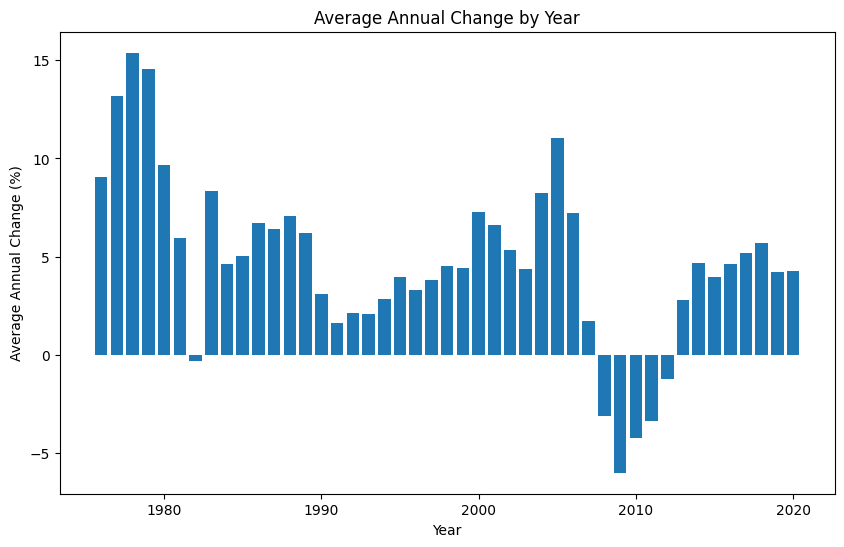

In [7]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Perform analysis
# Example: Calculate average annual change by year
avg_change_by_year = AnnualHousePriceIndexDF.groupBy("Year") \
    .agg(F.avg("Annual Change (%)").alias("Average_Change")) \
    .orderBy("Year")

# Convert DataFrame to Pandas for plotting
avg_change_pandas = avg_change_by_year.toPandas()

# Create a bar plot of average annual change by year
plt.figure(figsize=(10, 6))
plt.bar(avg_change_pandas["Year"], avg_change_pandas["Average_Change"])
plt.xlabel("Year")
plt.ylabel("Average Annual Change (%)")
plt.title("Average Annual Change by Year")
plt.show()


In [10]:
# Load the dataset
path = "/Users/shivanivellanki/Downloads/Zip_Zhvi_Summary_AllHomes.csv"
zip_summary_df = spark.read.csv(path, header=True, inferSchema=True)

# Explore the dataset
zip_summary_df.printSchema()
zip_summary_df.show(5)



root
 |-- Date: date (nullable = true)
 |-- RegionID: integer (nullable = true)
 |-- RegionName: integer (nullable = true)
 |-- State: string (nullable = true)
 |-- Metro: string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SizeRank: integer (nullable = true)
 |-- Zhvi: integer (nullable = true)
 |-- MoM: double (nullable = true)
 |-- QoQ: string (nullable = true)
 |-- YoY: string (nullable = true)
 |-- 5Year: string (nullable = true)
 |-- 10Year: string (nullable = true)
 |-- PeakMonth: timestamp (nullable = true)
 |-- PeakQuarter: string (nullable = true)
 |-- PeakZHVI: integer (nullable = true)
 |-- PctFallFromPeak: double (nullable = true)
 |-- LastTimeAtCurrZHVI: timestamp (nullable = true)

+----------+--------+----------+-----+--------------------+---------------+--------+--------+-------+--------------------+----+----+-----+------+-------------------+-----------+--------+--------------------+-------------------+
|      Date|Re

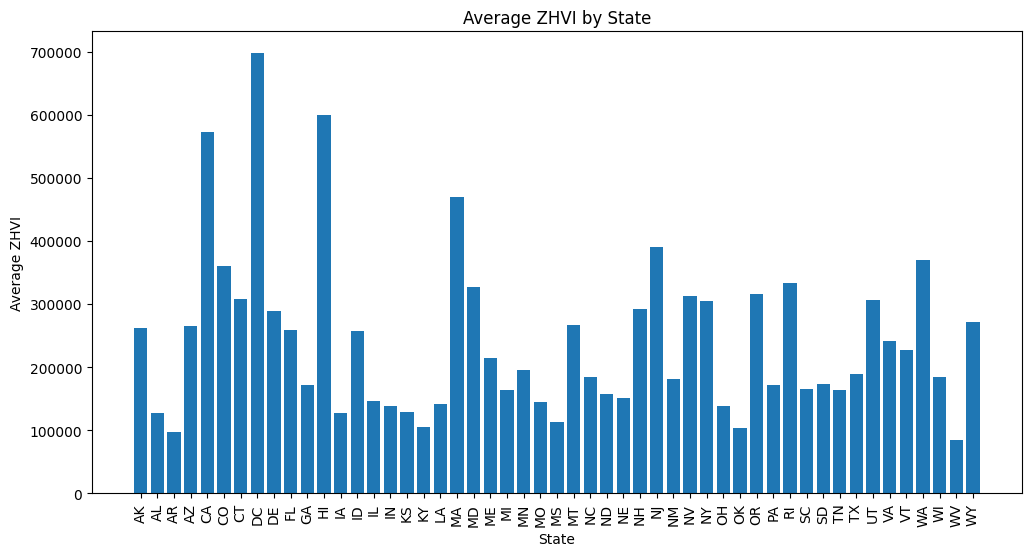

In [12]:
#Calculate average ZHVI by state
avg_zhvi_by_state = zip_summary_df.groupBy("State") \
    .agg(F.avg("Zhvi").alias("Average_ZHVI")) \
    .orderBy("State")

# Convert DataFrame to Pandas for plotting
avg_zhvi_pandas = avg_zhvi_by_state.toPandas()

# Create a bar plot of average ZHVI by state
plt.figure(figsize=(12, 6))
plt.bar(avg_zhvi_pandas["State"], avg_zhvi_pandas["Average_ZHVI"])
plt.xlabel("State")
plt.ylabel("Average ZHVI")
plt.title("Average ZHVI by State")
plt.xticks(rotation=90)
plt.show()
